In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
sns.set()

# Indexing and column rearrangement
There are circumstances in which it's useful to modify the order of your DataFrame columns. We do that now by extracting just two columns from the Pennsylvania election results DataFrame.

In this excersie we will read csv file and set the index to `country` and then assign a new DataFrame by selecting the list of columns `['winner', 'total', 'voters'].` 

In [2]:
# Read in filename and set the index: election
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col='county')

# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

In [3]:
results.head()

,winner,total,voters
county,,,
Adams,Romney,41973,61156
Allegheny,Obama,614671,924351
Armstrong,Romney,28322,42147
Beaver,Romney,80015,115157
Bedford,Romney,21444,32189


# Slicing rows
- Slice the row labels `'Perry'` to `'Potter'` and assign the output to `p_counties`.
- Print the p_counties DataFrame. This has been done for you.
- Slice the row labels `'Potter'` to `'Perry'` in reverse order. To do this for hypothetical row labels `'a'` and `'b'`, you could use a stepsize of `-1` like so: `df.loc['b':'a':-1]`.


In [4]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter']

In [5]:
p_counties

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


In [6]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1]

In [7]:
p_counties_rev

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


# Slicing columns
- Slice the columns from the starting column to `'Obama'` and assign the result to left_columns
- Slice the columns from `'Obama'` to `'winner'` and assign the result to middle_columns
- Slice the columns from `'Romney'` to the end and assign the result to right_columns

In [8]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:, :'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452


In [9]:

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:, 'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney


In [10]:
# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:, 'Romney':]

# Print the output of right_columns.head()
print(right_columns.head())

              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


# Subselecting DataFrames with lists
Lists can be used to select specific row and column labels with the `.loc[]` accessor. In this exercise, your job is to select the counties `['Philadelphia', 'Centre', 'Fulton']` and the columns `['winner','Obama','Romney']` from the election DataFrame.

- Create the list of row labels `['Philadelphia', 'Centre', 'Fulton']` and assign it to rows.
- Create the list of column labels `['winner', 'Obama', 'Romney']` and assign it to cols.
- Create a new DataFrame by selecting with rows and cols in `.loc[]` and assign it to three_counties.
- Print the three_counties DataFrame.

In [11]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols = ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows,cols]

In [12]:
# Print the three_counties DataFrame
three_counties

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486
Fulton,Romney,21.096291,77.748861


# Thresholding data
- Create a boolean array of the condition where the `'turnout'` column is greater than 70 and assign it to `high_turnout`.
- Filter the election DataFrame with the `high_turnout` array and assign it to `high_turnout_df`.

In [13]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

In [14]:
# Print the high_turnout_results DataFrame
high_turnout_df

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390
Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508


# Filtering columns using other columns
The election results DataFrame has a column labeled 'margin' which expresses the number of extra votes the winner received over the losing candidate. This number is given as a percentage of the total votes cast. It is reasonable to assume that in counties where this margin was less than 1%, the results would be too-close-to-call.

- Create a boolean array for the condition where the `'margin'` column is less than 1 and assign it to too_close.
- Convert the entries in the `'winner'` column where the result was too close to call to `np.nan`.
- Print the output of `election.info()`. 

In [15]:
# Create the boolean array: too_close
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

In [16]:
# Print the output of election.info()
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB


# Using apply() to transform a column
The `.apply()` method can be used on a pandas DataFrame to apply an arbitrary Python function to every element. In this exercise you'll take daily weather data in Pittsburgh in 2013.

- Apply the to_celsius function over the `['Mean TemperatureF','Mean Dew PointF']` columns of the weather DataFrame.
- Reassign the columns of `df_celsius` to `['Mean TemperatureC','Mean Dew PointC']`.
- Print to see the new DataFrame with the converted units.


In [17]:
weather = pd.read_csv('underground_weather.csv')

In [18]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

In [19]:
# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF','Mean Dew PointF']].apply(to_celsius)

In [20]:
# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

In [21]:
df_celsius.head()

,Mean TemperatureC,Mean Dew PointC
0,-2.222222,-2.777778
1,-6.111111,-11.111111
2,-4.444444,-9.444444
3,-2.222222,-7.222222
4,-1.111111,-6.666667


# Using .map() with a dictionary
The `.map()` method is used to transform values according to a Python dictionary look-up. In this excercise we are going to use a dictionary to map the values `'Obama'` and `'Romney'` in the `'winner'` column to the values `'blue'` and `'red'`, and assign the output to the new column `'color'`.

In [22]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election['winner'].map(red_vs_blue)

In [23]:
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red


# Index objects and labeled data
## pandas Data Structures
- Key building blocks
 - indexs: Sequence of lables
 - Series 1D array with index
 - DataFrames: 2D array with Seires as columns
- Indexes
 - Immutable (Like dictionary keys)
 - Homogenous in data type (Like Numpy arrays)

In [24]:
prices = [10.34, 10.36, 10.74, 10.71, 10.79]
shares = pd.Series(prices)

In [25]:
shares

0    10.34
1    10.36
2    10.74
3    10.71
4    10.79
dtype: float64

In [26]:
# Creating an index
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
shares = pd.Series(prices, index=days)

In [27]:
shares

Mon     10.34
Tue     10.36
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

In [28]:
shares.index

Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'], dtype='object')

In [29]:
#Modifying index name
shares.index.name = 'weekday'

In [30]:
shares

weekday
Mon     10.34
Tue     10.36
Wed     10.74
Thur    10.71
Fri     10.79
dtype: float64

# Extracting data with a MultiIndex
Read the data sales.csv into dataframe sales and extract elements from the outermost level of a MultiIndex is just like in the case of a single-level Index.

- Print `sales.loc[['CA', 'TX']]`. Note how New York is excluded.
- Print `sales['CA':'TX']`. Note how New York is included.

In [31]:
sales = pd.read_csv('Sales.csv', index_col='state')

In [32]:
sales.loc[['CA', 'TX']]

,month,eggs,salt,spam
state,,,,
CA,1,47,12.0,17
CA,2,110,50.0,31
TX,1,132,NaN,52
TX,2,205,60.0,55


In [33]:
sales['CA':'TX']

,month,eggs,salt,spam
state,,,,
CA,1,47,12.0,17
CA,2,110,50.0,31
NY,1,221,89.0,72
NY,2,77,87.0,20
TX,1,132,NaN,52
TX,2,205,60.0,55


# Setting & sorting a MultiIndex
- Create a MultiIndex by setting the index to be the columns `['state', 'month']`.
- Sort the MultiIndex using the `.sort_index()` method.
- Print the sales DataFrame.

In [34]:
sales = pd.read_csv('Sales.csv')

In [35]:
sales = sales.set_index(['state', 'month'])

In [36]:
# Sort the MultiIndex: sales
sales = sales.sort_index()

In [37]:
sales

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [38]:
sales.loc[('NY', 1)]

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64

# Indexing multiple levels of a MultiIndex
- Look up data for the New York column `('NY')` in month 1.
- Look up data for the California and Texas columns `('CA', 'TX')` in month 2.
- Look up data for all states in month 2. Use `(slice(None), 2)` to extract all rows in month 2.

In [39]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY', 1)]
NY_month1

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64

In [40]:
# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA','TX'],2), :]
CA_TX_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
TX,2,205,60.0,55


In [41]:
# Look up data for all states in month 2: all_month2
all_month2 = sales.loc[(slice(None), 2), :]
all_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
NY,2,77,87.0,20
TX,2,205,60.0,55


# Pivoting DataFrames
## Pivoting a single variable

Suppose you started a blog for a band, and you would like to log how many visitors you have had, and how many signed-up for your newsletter. To help design the tours later, you track where the visitors are. We're going to use users.csv for this. Import `user.csv` into DataFrame users.

- Pivot the users DataFrame with the rows indexed by `'weekday'`, the columns indexed by 'city', and the values populated with `'visitors'`.
- Print the pivoted DataFrame. 

In [42]:
users = pd.read_csv('users.csv')

In [43]:
users.head()

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [44]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday',columns='city', values='visitors')

In [45]:
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


# Pivoting all variables
If you do not select any particular variables, all of them will be pivoted. In this case - with the users DataFrame - both `'visitors'` and `'signups'` will be pivoted, creating hierarchical column labels.

- Pivot the users DataFrame with the `'signups'` indexed by `'weekday'` in the rows and `'city'` in the columns.
- Print the new DataFrame. This has been done for you.
- Pivot the users DataFrame with both '`signups'` and `'visitors'` pivoted - that is, all the variables. This will happen automatically if you do not specify an argument for the values parameter of `.pivot()`.
- Print the pivoted DataFrame. 

In [46]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday', columns='city', values='signups')

In [47]:
signups_pivot

city,Austin,Dallas
weekday,,
Mon,3,5
Sun,7,12


In [48]:
# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday', columns='city')


In [49]:
pivot

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

# Going from wide to long
You can move multiple columns into a single column (making the data long and skinny) by "melting" multiple columns. In this exercise, you will practice doing this.

- Define a DataFrame `skinny` where you melt the `'visitors'` and `'signups'` columns of users into a single column.
- Print `skinny` to verify the results. Note the value column that had the cell values in users.

In [50]:
# Melt users: skinny
skinny = pd.melt(users, id_vars=['weekday', 'city'])

# Print skinny
print(skinny)

  weekday    city  variable  value
0     Sun  Austin  visitors    139
1     Sun  Dallas  visitors    237
2     Mon  Austin  visitors    326
3     Mon  Dallas  visitors    456
4     Sun  Austin   signups      7
5     Sun  Dallas   signups     12
6     Mon  Austin   signups      3
7     Mon  Dallas   signups      5


# Obtaining key-value pairs with melt()
Sometimes, all you need is some key-value pairs, and the context does not matter. If said context is in the index, you can easily obtain what you want. For example, in the users DataFrame, the visitors and signups columns lend themselves well to being represented as key-value pairs. So if you created a hierarchical index with `'city'` and `'weekday'` columns as the index, you can easily extract key-value pairs for the `'visitors'` and `'signups'` columns by melting users and specifying `col_level=0`.

- Set the index of users to `['city', 'weekday']`.
- Print the DataFrame users_idx to see the new index.
- Obtain the key-value pairs corresponding to visitors and signups by melting `users_idx` with the keyword argument `col_level=0`.

In [51]:
# Set the new index: users_idx
users_idx = users.set_index(['city', 'weekday'])
users_idx

,,visitors,signups
city,weekday,,
Austin,Sun,139,7
Dallas,Sun,237,12
Austin,Mon,326,3
Dallas,Mon,456,5


In [52]:
# Obtain the key-value pairs: kv_pairs
kv_pairs = pd.melt(users_idx, col_level=0)
kv_pairs

,variable,value
0,visitors,139
1,visitors,237
2,visitors,326
3,visitors,456
4,signups,7
5,signups,12
6,signups,3
7,signups,5


# Setting up a pivot table
A pivot table allows you to see all of your variables as a function of two other variables. In this exercise, you will use the .pivot_table() method to see how the users DataFrame entries appear when presented as functions of the 'weekday' and 'city' columns. That is, with the rows indexed by 'weekday' and the columns indexed by 'city'.

- Use a pivot table to index the rows of users by `'weekday'` and the columns of users by `'city'`. These correspond to the index and columns parameters of `.pivot_table()`.
- Print `by_city_day`


In [53]:
# Create the DataFrame with the appropriate pivot table: by_city_day
by_city_day = users.pivot_table(index='weekday', columns='city')

In [54]:
by_city_day

signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237

# Using other aggregations in pivot tables
You can also use aggregation functions with in a pivot table by specifying the aggfunc parameter. In this exercise, you will practice using the `'count'` and len aggregation functions - which produce the same result - on the users DataFrame.

- Define a DataFrame count_by_weekday1 that shows the count of each column with the parameter `aggfunc='count'`. The index here is `'weekday'`.
- Print count_by_weekday1.
- Replace `aggfunc='count'` with `aggfunc=len` and verify you obtain the same result.

In [55]:
# Use a pivot table to display the count of each column: count_by_weekday1
count_by_weekday1 = users.pivot_table(index='weekday', aggfunc='count')


In [56]:
count_by_weekday1

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [57]:
# Replace 'aggfunc='count'' with 'aggfunc=len': count_by_weekday2
count_by_weekday2 = users.pivot_table(index='weekday', aggfunc=len)

In [58]:
count_by_weekday1.equals(count_by_weekday2)

True

# Using margins in pivot tables
Sometimes it's useful to add totals in the margins of a pivot table. You can do this with the argument margins=True. In this exercise, you will practice using margins in a pivot table along with a new aggregation function: sum.

In [59]:
# Create the DataFrame with the appropriate pivot table: signups_and_visitors
signups_and_visitors = users.pivot_table(index='weekday', aggfunc=sum)
signups_and_visitors

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376


In [60]:
# Add in the margins: signups_and_visitors_total 
signups_and_visitors_total = users.pivot_table(index='weekday', aggfunc=sum, margins=True)
signups_and_visitors_total

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376
All,27,1158


# Grouping by multiple columns
We are going to use `groupby()` to analyze the titanic data set.
The `'pclass'` column identifies which class of ticket was purchased by the passenger and the `'embarked'` column indicates at which of the three ports the passenger boarded the Titanic. `'S'` stands for Southampton, England, `'C'` for Cherbourg, France and `'Q'` for Queenstown, Ireland. The task is to first group by the `'pclass'` column and count the number of rows in each class using the `'survived'` column. You will then group by the `'embarked'` and `'pclass'` columns and count the number of passengers.

- Group by the `'pclass'` column and save the result as by_class.
- Aggregate the `'survived'` column of `by_class` using `.count()`. Save the result as `count_by_class`.
- Print `count_by_class`. This has been done for you.
- Group titanic by the `'embarked'` and `'pclass'` columns. Save the result as `by_mult`.
- Aggregate the `'survived'` column of `by_mult` using `.count()`. Save the result as count_mult.
- Print `count_mult`

In [61]:
# Group titanic by 'pclass'
titanic = pd.read_csv('titanic.csv')
by_class = titanic.groupby(by='pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(by=['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult =  by_mult['survived'].count()

# Print count_mult
print(count_mult)


pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


Grouping your data by certain columns like this and aggregating them by another column - in this case, `'survived'` - allows you to carefully examine your data for interesting insights.

# Grouping by another series
In this exercise, you'll use two data sets from Gapminder.org to investigate the average life expectancy (in years) at birth in 2010 for the 6 continental regions. To do this you'll read the life expectancy data per country into one pandas DataFrame and the association between country and region into another.

By setting the index of both DataFrames to the country name, you'll then use the region information to group the countries in the life expectancy DataFrame and compute the mean value for 2010.

The life expectancy CSV file is available to you in the variable `life_fname` and the regions filename is available in the variable `regions_fname`

- Read `life_fname` into a DataFrame called life and set the index to `'Country'`.
- Read `regions_fname` into a DataFrame called regions and set the index to `'Country'`.
- Group life by the region column of regions and store the result in `life_by_region`.
- Print the mean over the 2010 column of `life_by_region`.


In [62]:
# Read life_fname into a DataFrame: life
life_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'
life = pd.read_csv(life_fname, index_col='Country')

# Read regions_fname into a DataFrame: regions
regions_fname = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'
regions = pd.read_csv(regions_fname, index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(by=regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


# Computing multiple aggregates of multiple columns
The `.agg()` method can be used with a tuple or list of aggregations as input. When applying multiple aggregations on multiple columns, the aggregated DataFrame has a multi-level column index.

In this exercise, you're going to group passengers on the Titanic by `'pclass'` and aggregate the `'age'` and `'fare'` columns by the functions `'max'` and `'median'`. You'll then use multi-level selection to find the oldest passenger per class and the median fare price per class.

- Group titanic by `'pclass'` and save the result as `by_class`.
- Select the `'age'` and `'fare'` columns from `by_class` and save the result as `by_class_sub`.
- Aggregate `by_class_sub` using `'max'` and `'median'`. You'll have to pass 'max' and 'median' in the form of a list to `.agg()`.
- Use .loc[] to print all of the rows and the column specification ('age','max'). This has been done for you.
- Use `.loc[]` to print all of the rows and the column specification `('fare','median')`.

In [63]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]


# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

# Print the maximum age in each class
aggregated.loc[:, ('age','max')]



pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64

In [64]:
# Print the median fare in each class
aggregated.loc[:, ('fare','median')]

pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64

# Aggregating on index levels/fields
If you have a DataFrame with a multi-level row index, the individual levels can be used to perform the groupby. This allows advanced aggregation techniques to be applied along one or more levels in the index and across one or more columns.

In this exercise you'll use the full Gapminder dataset which contains yearly values of life expectancy, population, child mortality (per 1,000) and per capita gross domestic product (GDP) for every country in the world from 1964 to 2013.

Your job is to create a multi-level DataFrame of the columns 'Year', `'Region'` and `'Country'`. Next you'll group the DataFrame by the 'Year' and 'Region' levels. Finally, you'll apply a dictionary aggregation to compute the total population, spread of per capita GDP values and average child mortality rate.


- Read `'gapminder.csv'` into a DataFrame with `index_col=['Year','region','Country']`. Sort the index.
- Group gapminder with a level of `['Year','region']` using its level parameter. Save the result as by_year_region.
- Define the function spread which returns the maximum and minimum of an input series. 
- Create a dictionary with `'population':'sum'`, `'child_mortality':'mean'` and `'gdp':spread` as aggregator. This has been done for you.
- Use the aggregator dictionary to aggregate `by_year_region`. Save the result as aggregated.
- Print the last 6 entries of aggregated. 

In [65]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('gapminder_tidy.csv', 
                        index_col=['Year','region','Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(['Year','region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
aggregated.tail(6)


population  child_mortality       gdp
Year region                                                             
2013 America                     9.629087e+08        17.745833   49634.0
     East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0

# Grouping on a function of the index
Groubpy operations can also be performed on transformations of the index values. In the case of a DateTimeIndex, we can extract portions of the datetime over which to group.

In this exercise you'll read in a set of sample sales data from February 2015 and assign the 'Date' column as the index. Your job is to group the sales data by the day of the week and aggregate the sum of the `'Units'` column.

Is there a day of the week that is more popular for customers? To find out, you're going to use `.strftime('%a')` to transform the index datetime values to abbreviated days of the week.

- Read `'sales.csv'` into a DataFrame with `index_col='Date'` and `parse_dates=True.`
- Create a groupby object with `sales.index.strftime('%a')` as input and assign it to by_day.
- Aggregate the `'Units'` column of `by_day with` the `.sum()` method. - Save the result as `units_sum`.
- Print `units_sum`

In [66]:
# Read file: sales
sales_feb = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Create a groupby object: by_day
by_day = sales_feb.groupby(sales_feb.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
units_sum

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

 It looks like Monday, Wednesday, and Thursday were the most popular days for customers!

# Detecting outliers with Z-Scores
You can apply a `.transform()` method after grouping to apply a function to groups of data independently. The z-score is also useful to find outliers: a `z-score` value of `+/- 3` is generally considered to be an outlier.

In this example, you're going to normalize the Gapminder data in 2010 for life expectancy and fertility by the z-score per region. Using boolean indexing, you will filter out countries that have high fertility rates and low life expectancy for their region.

Load the Gapminder into a DataFrame for 2010  and indexed by `'Country'` as `gapminder_2010`

- Import zscore from scipy.stats.
- Group gapminder_2010 by `'region'` and transform the `['life','fertility']` columns by zscore.
- Construct a boolean Series of the bitwise or between `standardized['life'] < -3` and `standardized['fertility'] > 3`.
- Filter `gapminder_2010` using `.loc[]` and the outliers Boolean Series. - - Save the result as `gm_outliers`.
- Print `gm_outliers`

In [67]:
gapminder = pd.read_csv('gapminder_tidy.csv', index_col='Country')
gapminder_2010 = gapminder[gapminder['Year'] == 2010]

In [68]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life','fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
gm_outliers

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Guatemala,2010,3.974,71.100,14388929.0,34.5,6849.0,America
Haiti,2010,3.350,45.000,9993247.0,208.8,1518.0,America
Tajikistan,2010,3.780,66.830,6878637.0,52.6,2110.0,Europe & Central Asia
Timor-Leste,2010,6.237,65.952,1124355.0,63.8,1777.0,East Asia & Pacific


# Filling missing data (imputation) by group
Many statistical and machine learning packages cannot determine the best action to take when missing data entries are encountered. Dealing with missing data is natural in pandas (both in using the default behavior and in defining a custom behavior). In Chapter 1, you practiced using the `.dropna()` method to drop missing values. Now, you will practice imputing missing values. You can use .groupby() and `.transform()` to fill missing data appropriately for each group.

Your job is to fill in missing 'age' values for passengers on the Titanic with the median age from their 'gender' and 'pclass'. To do this, you'll group by the `'sex'` and `'pclass'` columns and transform each group with a custom function to call `.fillna()` and impute the median value.

- Group titanic by `'sex'` and `'pclass'`. Save the result as by_sex_class.
- Write a function called `impute_median()` that fills missing values with the median of a series. This has been done for you.
- Call `.transform()` with impute_median on the 'age' column of `by_sex_class`.
- Print the output of `titanic.tail(10)`.

In [69]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class.age.transform(impute_median)

# Print the output of titanic.tail(10)
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,25.0,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,25.0,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,22.0,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Imputing missing values intelligently is always preferrable to dropping them entirely!

In [70]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [71]:
gapminder_2010

,Year,fertility,life,population,child_mortality,gdp,region
Country,,,,,,,
Afghanistan,2010,5.659,59.612,31411743.0,105.00,1637.0,South Asia
Albania,2010,1.741,76.780,3204284.0,16.60,9374.0,Europe & Central Asia
Algeria,2010,2.817,70.615,35468208.0,27.40,12494.0,Middle East & North Africa
Angola,2010,6.218,50.689,19081912.0,182.50,7047.0,Sub-Saharan Africa
Antigua and Barbuda,2010,2.130,75.437,88710.0,9.90,20567.0,America
Argentina,2010,2.215,75.772,40412376.0,14.60,15765.0,America
Armenia,2010,1.550,74.291,3092072.0,18.00,6508.0,Europe & Central Asia
Aruba,2010,1.701,75.059,107488.0,17.84,33288.0,America
Australia,2010,1.886,82.091,22268384.0,4.80,41330.0,East Asia & Pacific


In [72]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
reg_disp.loc[['United States','United Kingdom','China']]

,regional spread(gdp),z(gdp)
Country,,
United States,47855.0,3.013374
United Kingdom,89037.0,0.572873
China,96993.0,-0.432756


# Grouping and filtering with .apply()
By using `.apply()`, you can write functions that filter rows within groups. The .apply() method will handle the iteration over individual groups and then re-combine them back into a Series or DataFrame.

In this exercise you'll take the Titanic data set and analyze survival rates from the `'C'` deck, which contained the most passengers. To do this you'll group the dataset by `'sex'` and then use the `.apply()` method on a provided user defined function which calculates the mean survival rates on the `'C'` deck:

- Group titanic by `'sex'`. Save the result as `by_sex`.
- Apply the provided `c_deck_survival` function on the `by_sex` DataFrame. Save the result as `c_surv_by_sex`.


In [73]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [74]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival
c_surv_by_sex = by_sex.apply(c_deck_survival)

In [75]:
c_surv_by_sex

sex
female    0.913043
male      0.312500
dtype: float64

 It looks like female passengers on the `'C'` deck had a much higher chance of surviving!



# Grouping and filtering with .filter()
You can use groupby with the `.filter()` method to remove whole groups of rows from a DataFrame based on a boolean condition.

In this exercise, you'll take the February sales data and remove entries from companies that purchased less than or equal to 35 Units in the whole month.

First, you'll identify how many units each company bought for verification. Next you'll use the `.filter()` method after grouping by `'Company`' to remove all rows belonging to companies whose sum over the `'Units'` column was less than or equal to 35. Finally, verify that the three companies whose total Units purchased were less than or equal to 35 have been filtered out from the DataFrame.

- Group sales by `'Company'`. Save the result as by_company.
- Compute and print the sum of the `'Units'` column of `by_company.`
- Call `.filter()` on `by_company` with `lambda g:g['Units'].sum() > 35` as input and print the result.

In [76]:
# Read the CSV file into a DataFrame: sales
sales = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter(lambda g:g['Units'].sum() > 35)

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64


In [77]:
by_com_filt

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


# Filtering and grouping with .map()
You have seen how to group by a column, or by multiple columns. Sometimes, you may instead want to group by a function/transformation of a column. The key here is that the Series is indexed the same way as the DataFrame. You can also mix and match column grouping with Series grouping.

In this exercise your job is to investigate survival rates of passengers on the Titanic by 'age' and 'pclass'. In particular, the goal is to find out what fraction of children under 10 survived in each `'pclass'`. You'll do this by first creating a boolean array where True is passengers under 10 years old and False is passengers over 10. You'll use `.map()` to change these values to strings.

Finally, you'll group by the under 10 series and the `'pclass'` column and aggregate the `'survived'` column. The `'survived'` column has the value 1 if the passenger survived and 0 otherwise. The mean of the `'survived'` column is the fraction of passengers who lived.

- Create a Boolean Series of `titanic['age'] < 10` and call .map with `{True:'under 10', False:'over 10'}`.
- Group titanic by the under10 Series and then compute and print the mean of the `'survived'` column.
- Group titanic by the under10 Series as well as the `'pclass'` column and then compute and print the mean of the `'survived'` column.

In [78]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()


# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10,'pclass'])['survived'].mean()

In [79]:
survived_mean_1

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [80]:
survived_mean_2

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64

It  looks like passengers under the age of 10 had a higher survival rate than those above the age of 10.

In [81]:
medals = pd.read_csv('all_medalists.csv')

# Using .pivot_table() to count medals by type
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.
In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

- Construct a pivot table counted from the DataFrame medals aggregating by count. Use `'NOC'` as the index, `'Athlete'` for the values, and `'Medal'` for the columns.
- Modify the DataFrame counted by adding a column `counted['totals']`. The new column 'totals' should contain the result of taking the sum along the columns (i.e., use `.sum(axis='columns')`).
- Overwrite the DataFrame counted by sorting it with the `.sort_values()` method. Specify the keyword argument `ascending=False`.
- Print the first 15 rows of counted using `.head(15)`

In [82]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values(by='totals',ascending=False)

In [83]:
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


# Applying .drop_duplicates()
What could be the difference between the 'Event_gender' and 'Gender' columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (E`vent_gender='M'`, `Gender='Women'`). However, you will see that, strangely enough, there is an observation with (`Event_gender='W'`, `Gender='Men'`).

The duplicates can be dropped using the `.drop_duplicates()` method, leaving behind the unique observations. The DataFrame has been loaded as medals.

- Select the columns `'Event_gender'` and `'Gender'`.
- Create a dataframe ev_gen_uniques containing the unique pairs contained in `ev_gen`.
- Print `ev_gen_uniques`

In [84]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


# Case Study - Summer Olympics
Grouping and aggregating
The Olympic medal data for the following exercises comes from The Guardian. It comprises records of all events held at the Olympic games between 1896 and 2012.

Suppose you have loaded the data into a DataFrame medals. You now want to find the total number of medals awarded to the USA per edition. To do this, filter the `'USA'` rows and use the `groupby()` function to put the `'Edition'` column on the index:

```USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')```

Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?


In [85]:
medals = pd.read_csv('all_medalists.csv', sep=',')

In [86]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

In [87]:
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

# Using .value_counts() for ranking
For this exercise, you will use the pandas Series method `.value_counts()` to determine the top 15 countries ranked by total number of medals.

Notice that `.value_counts()` sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

- Extract the `'NOC'` column from the DataFrame medals and assign the result to `country_names`. Notice that this Series has repeated entries for every medal (of any type) a country has won in any Edition of the Olympics.
- Create a Series `medal_counts` by applying `.value_counts()` to the Series `country_names`.
- Print the top 15 countries ranked by total number of medals won. 

In [88]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

# Using .pivot_table() to count medals by type
Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

- Construct a pivot table counted from the DataFrame medals aggregating by count. Use `'NOC'` as the index, `'Athlete'` for the values, and `'Medal'` for the columns.
- Modify the DataFrame counted by adding a column `counted['totals']`. The new column 'totals' should contain the result of taking the sum along the columns (i.e., use `.sum(axis='columns')`).
- Overwrite the DataFrame counted by sorting it with the .sort_values() method. Specify the keyword argument `ascending=False`.
- Print the first 15 rows of counted using `.head(15)`

In [89]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values(by='totals',ascending=False)

# Print the top 15 rows of counted
counted.head(15)


Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


# Applying .drop_duplicates()
What could be the difference between the `'Event_gender'` and `'Gender'` columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (Event_gender='M', `Gender='Women'`). However, you will see that, strangely enough, there is an observation with (`Event_gender='W'`, `Gender='Men'`).

The duplicates can be dropped using the `.drop_duplicates()` method, leaving behind the unique observations. The DataFrame has been loaded as medals.

- Select the columns `'Event_gender'` and `'Gender'`.
- Create a dataframe `ev_gen_uniques` containing the unique pairs contained in `ev_gen`.
- Print `ev_gen_uniques`.

In [90]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


# Finding possible errors with .groupby()
You will now use `.groupby()` to continue your exploration. Your job is to group by `'Event_gender'` and 'Gender' and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

- Group medals by `'Event_gender'` and `'Gender'`.
- Create a `medal_count_by_gender` DataFrame with a group count using the `.count()` method.
- Print `medal_count_by_gender`. This has been done for you, so hit 'Submit Answer' to view the result.

In [91]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

# Locating suspicious data
You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

- Create a Boolean Series with a condition that captures the only row that has `medals.Event_gender == 'W'` and `medals.Gender == 'Men'`. Be sure to use the & operator.
- Use the Boolean Series to create a DataFrame called suspect with the suspicious row.
- Print suspect

In [92]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


# Using `.nunique()` to rank by distinct sports
You may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series `S`, `S.nunique()` returns the number of distinct categories.

- Group medals by `'NOC'`.
- Compute the number of distinct sports in which each country won medals. To do this, select the `'Sport'` column from `country_grouped` and apply `.nunique()`.
- Sort Nsports in descending order with `.sort_values()` and `ascending=False`.
- Print the first 15 rows of Nsports

In [93]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

# Counting USA vs. USSR Cold War Olympic Sports
The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame `medal`s by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as `medals`, are `'USA'` & `'URS'`.

- Using medals, create a Boolean Series called `during_cold_war` that is True when `'Edition'` is `>=` `1952` and `<=` `1988`.
- Using medals, create a Boolean Series called `is_usa_urs` that is True when `'NOC'` is either `'USA'` or `'URS'`.
- Filter the medals DataFrame using `during_cold_war` and `is_usa_urs` to create a new DataFrame called `cold_war_medals`.
- Group `cold_war_medals` by `'NOC'`.
- Create a Series Nsports from `country_grouped` using indexing & chained methods:
  - Extract the column `'Sport'`.
  - Use `.nunique()` to get the number of unique elements in each group;
  - Apply `.sort_values(ascending=False)` to rearrange the Series.
- Print the final Series Nsports`. 

In [94]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [101]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

the USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!

# Counting USA vs. USSR Cold War Olympic Medals
For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- You'll need a pivot table with years (`'Edition'`) on the index and countries (`'NOC'`) on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.
- You'll need to slice the Cold War period and subset the `'USA'` and `'URS'` columns.
- You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using `.idxmax(axis='columns')`. If `.max()` returns the maximum value of Series or 1D array, .idxmax() returns the index of the maximizing element. The argument `axis=column`s or `axis=1` is required because, by default, this aggregation would be done along columns for a DataFrame.
- The final Series contains either `'USA'` or `'URS'` according to which country won the most medals in each Olympic edition. You can use `.value_counts()` to count the number of occurrences of each.

## Instructions
- Construct medals_won_by_country using medals.pivot_table().
  - The index should be the years (`'Edition'`) & the columns should be country (`'NOC'`)
  - The values should be `'Athlete'` (which captures every medal regardless of kind) & the aggregation method should be `'count'` (which captures the total number of medals won).
- Create `cold_war_usa_urs_medals` by slicing the pivot table `medals_won_by_country`. Your slice should contain the editions from years `1952:1988` and only the columns `'USA'` & `'URS'` from the pivot table.
- Create the Series most_medals by applying the `.idxmax()` method to cold_war_usa_urs_medals. Be sure to use `axis='columns'`.
- Print the result of applying `.value_counts()` to `most_medals`. The result reported gives the number of times each of the USA or the USSR won more Olympic medals in total than the other between 1952 and 1988.

In [108]:
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc='count')

In [109]:
medals_won_by_country.loc[1952:1988, ['USA','URS']]

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [110]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
most_medals.value_counts()


URS    8
USA    2
dtype: int64

# Visualizing USA Medal Counts by Edition: Line Plot
Your job in this exercise is to visualize the medal counts by `'Edition'` for the USA. The DataFrame has been pre-loaded for you as `medals`.

- Create a DataFrame usa with data only for the USA.
- Group usa such that `['Edition', 'Medal']` is the index. Aggregate the count over `'Athlete'`.
- Use `.unstack()` with `level='Medal'` to reshape the DataFrame `usa_medals_by_year`.
- Construct a line plot from the final DataFrame `usa_medals_by_year`

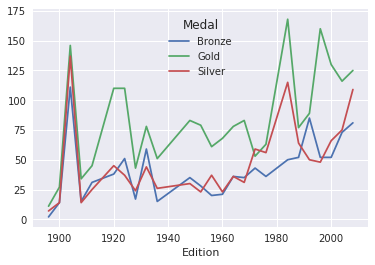

In [122]:
# Create the DataFrame: usa
usa = medals[medals['NOC']=='USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

# Visualizing USA Medal Counts by Edition: Area Plot
- Create an area plot of `usa_medals_by_year`. This can be done by using `.plot.area()`

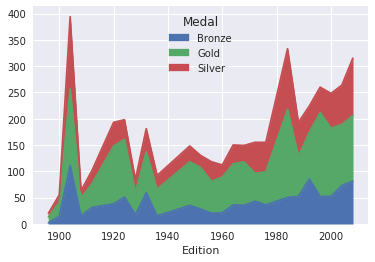

In [124]:
# Create an area plot of usa_medals_by_year
_ = usa_medals_by_year.plot.area()
plt.show()

# Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: `Bronze` < `Gold` < `Silver`. However, you would prefer an ordering consistent with the Olympic rules: `Bronze` < `Silver` < `Gold`.

You can achieve this using Categorical types. In this final exercise, after redefining the `'Medal'` column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.


- Redefine the 'Medal' column of the DataFrame medals as an ordered categorical. To do this, use `pd.Categorical()` with three keyword arguments:
  - values = `medals.Medal`.
  - `categories=['Bronze', 'Silver', 'Gold']`.
  - `ordered=True`.
After this, you can verify that the type has changed using medals.info().
- Plot the final DataFrame `usa_medals_by_year` as an area plot.

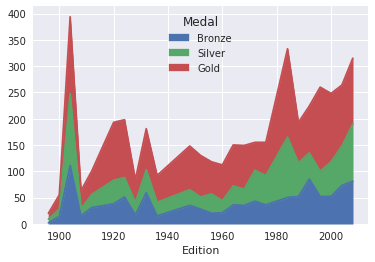

In [125]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()